In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 567 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import numpy as np
import pandas as pd

import pandas_datareader as pdr
import pandas_datareader.data as web 

import yfinance as yf  

import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')
import seaborn

In [4]:
# strange erros with this function. 
def get_symbols(symbols,data_source,ohlc,begin_date=None,end_date=None):
    out = []
    new_symbols = []
    
    for symbol in symbols:
        df = web.DataReader(symbol, data_source, begin_date, end_date)\
        [['High','Low','Open','Close','Volume','Adj Close']]
        new_symbols.append(symbol) 
        out.append(df[ohlc].astype('float'))
        data = pd.concat(out, axis = 1)
        data.columns = new_symbols
        
    return data

In [5]:
start = pd.Timestamp('2019-01')
end = pd.Timestamp('2022-09')     

In [6]:
symbols = ['SPY','AAPL','AMZN','AMD','BAC','F','NVDA','T','AAL','GOOGL','GOOG','MSFT','WFC','PFE','INTC','CCL','MU','CSCO','FCX','MRO','M','XOM','CMCSA','OXY','C','DAL','UAL','NCLH','BA','PCG','HAL','JPM','KO','KMI','VZ','BMY','CSX','SLB','ORCL','MGM','DIS','GM','MS','HPQ','QCOM','COTY','RF','HBAN','KEY','GE','MRK','HPE','GILD','EBAY','AIV','SCHW','MO','WMB','RRC','APA','KR','CVS','HST','BSX','SBUX','CVX','GPS','LUV','V','ABBV','AMAT','NEE','DVN','NEM','EXC','KHC','COP','ATVI','PYPL','PG','JNJ','WMT','MPC','NFLX','RCL','USB','TJX','NKE','FTI','MDLZ','CRM','FITB','WBA','SYF','KSS','HBI','EQT','UAA','WU','ABT','CNP','JWN']
# prices = get_symbols(symbols,data_source='yahoo',ohlc='Close', begin_date=start, end_date=end)  

data = yf.download( tickers = symbols, 
                    start="2019-01-01", 
                    end="2021-09-30",
                    interval = "1mo",    # Monthly Data 
                    auto_adjust = True  ) 


[*********************100%***********************]  102 of 102 completed


In [7]:
df = data[['Close']]  
df.columns = df.columns.droplevel()
df = df.reset_index()   

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date') 
df.head() 

,AAL,AAPL,ABBV,ABT,AIV,AMAT,AMD,AMZN,APA,ATVI,...,UAL,USB,V,VZ,WBA,WFC,WMB,WMT,WU,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,35.200802,40.160961,66.136459,68.450661,4.612332,37.253212,24.410000,85.936501,30.461859,46.059231,...,87.269997,44.733837,131.519669,45.903358,61.762615,43.573761,20.857660,89.531967,15.488340,58.679623
2019-02-01,35.063034,41.780048,66.072113,73.140289,4.557380,36.547794,23.530001,81.991501,31.040873,41.086704,...,87.809998,45.197258,144.290741,47.949303,60.848061,44.849758,20.671782,92.484283,15.165843,63.283989
2019-03-01,31.339825,46.030357,67.197784,75.326401,4.721516,37.999470,25.520000,89.037498,32.425453,44.391972,...,79.779999,42.136898,152.417664,49.810997,54.409138,43.438374,22.244040,91.120224,15.675046,65.419655
2019-04-01,33.727806,48.628120,66.197182,74.968315,4.634202,42.224838,27.629999,96.325996,30.788279,47.382572,...,88.860001,46.983704,160.458633,48.176746,46.067604,43.519283,22.251137,96.598221,16.679564,64.998619
2019-05-01,26.869753,42.424507,64.810616,72.029854,4.689594,37.070091,27.410000,88.753502,24.555891,42.625637,...,77.650002,44.234478,157.433533,46.256042,42.430012,39.887432,20.719551,95.283218,16.645241,57.298870


In [8]:
n_row, n_col = df.shape    
print("Number of Rows = " + str(n_row))
print('Number of Columns = ' + str(n_col)) 

Number of Rows = 33
Number of Columns = 102


In [9]:
returns = df.pct_change()  # Simple Returns
returns = returns.dropna(how='all').dropna(axis=1)  
returns.head()  

,AAL,AAPL,ABBV,ABT,AIV,AMAT,AMD,AMZN,APA,ATVI,...,UAL,USB,V,VZ,WBA,WFC,WMB,WMT,WU,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-01,-0.003914,0.040315,-0.000973,0.068511,-0.011914,-0.018936,-0.036051,-0.045906,0.019008,-0.107959,...,0.006188,0.010360,0.097104,0.044571,-0.014808,0.029284,-0.008912,0.032975,-0.020822,0.078466
2019-03-01,-0.106186,0.101731,0.017037,0.029889,0.036015,0.039720,0.084573,0.085936,0.044605,0.080446,...,-0.091447,-0.067711,0.056323,0.038826,-0.105820,-0.031469,0.076058,-0.014749,0.033576,0.033747
2019-04-01,0.076196,0.056436,-0.014890,-0.004754,-0.018493,0.111195,0.082680,0.081859,-0.050490,0.067368,...,0.113813,0.115025,0.052756,-0.032809,-0.153311,0.001863,0.000319,0.060118,0.064084,-0.006436
2019-05-01,-0.203335,-0.127573,-0.020946,-0.039196,0.011953,-0.122079,-0.007962,-0.078613,-0.202427,-0.100394,...,-0.126153,-0.058514,-0.018853,-0.039868,-0.078962,-0.083454,-0.068832,-0.013613,-0.002058,-0.118460
2019-06-01,0.201032,0.134873,-0.052014,0.104690,0.011281,0.166702,0.107990,0.066792,0.111239,0.088310,...,0.127495,0.043825,0.077400,0.051150,0.117391,0.076796,0.062927,0.095001,0.025258,0.095215


In [10]:
returns['SPY']

Date
2019-02-01    0.032416
2019-03-01    0.013636
2019-04-01    0.045437
2019-05-01   -0.063771
2019-06-01    0.064410
2019-07-01    0.020056
2019-08-01   -0.016743
2019-09-01    0.014772
2019-10-01    0.026825
2019-11-01    0.036198
2019-12-01    0.024021
2020-01-01    0.004511
2020-02-01   -0.079166
2020-03-01   -0.129987
2020-04-01    0.133610
2020-05-01    0.047645
2020-06-01    0.013275
2020-07-01    0.063552
2020-08-01    0.069797
2020-09-01   -0.041281
2020-10-01   -0.021031
2020-11-01    0.108777
2020-12-01    0.032647
2021-01-01   -0.005971
2021-02-01    0.027805
2021-03-01    0.041987
2021-04-01    0.056359
2021-05-01    0.006566
2021-06-01    0.019093
2021-07-01    0.027764
2021-08-01    0.029760
2021-09-01   -0.049650
Name: SPY, dtype: float64

Method 1 for selecting stocks

using both cumulative returns and sharpe ratio

In [11]:
cumulative_returns = returns.cumsum()  

In [12]:
def sharpe_ratio(return_values):
  return(  np.mean(return_values) / np.std(return_values) )  

In [13]:
len(cumulative_returns['AAPL'])  
cumulative_returns['AAPL'].iloc[22]

1.3125099749381448

In [14]:
c = cumulative_returns.columns

avg_return = []
sr = []
max_return = []


for ticker in c:
  cumulative_values = np.array(cumulative_returns[ticker])
  l = len(cumulative_values)

  sr.append( sharpe_ratio( cumulative_values  ))
  max_return.append( cumulative_values[(l-1)] )

In [15]:
summary_table = pd.DataFrame({'COMPANY':c, 
                              'CUMULATIVE_RETURNS': max_return, 
                              'SHARPE_RATIO': sr} )  

In [16]:
summary_table = summary_table.sort_values(by = 'CUMULATIVE_RETURNS', ascending = False)
summary_table.head(20)    

,COMPANY,CUMULATIVE_RETURNS,SHARPE_RATIO
8,APA,2.022815,0.847644
83,RRC,1.995573,0.243807
73,NVDA,1.976876,1.583069
6,AMD,1.665476,1.608224
32,FCX,1.452297,0.839721
5,AMAT,1.416472,1.345175
1,AAPL,1.399127,1.756439
80,QCOM,1.279928,2.364958
27,DVN,1.279076,0.370281
79,PYPL,1.219991,1.475102


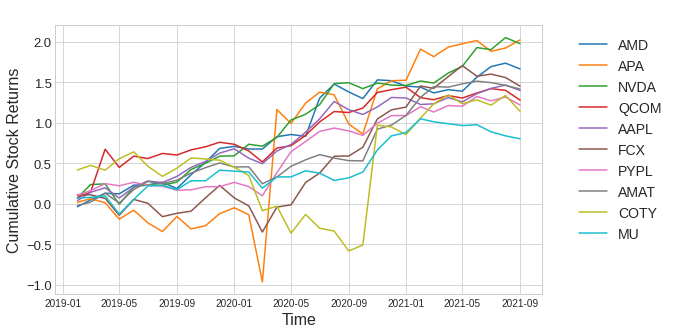

In [17]:

with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(9.5 , 4.75))
  
    plt.plot(cumulative_returns['AMD'], label = 'AMD')  
    plt.plot(cumulative_returns['APA'], label = 'APA') 
    plt.plot(cumulative_returns['NVDA'], label = 'NVDA') 
    plt.plot(cumulative_returns['QCOM'], label = 'QCOM') 
    plt.plot(cumulative_returns['AAPL'], label = 'AAPL')
    plt.plot(cumulative_returns['FCX'], label = 'FCX')
    plt.plot(cumulative_returns['PYPL'], label = 'PYPL')
    plt.plot(cumulative_returns['AMAT'], label = 'AMAT')
    plt.plot(cumulative_returns['COTY'], label = 'COTY')
    plt.plot(cumulative_returns['MU'], label = 'MU')

    plt.ylabel("Cumulative Stock Returns", fontsize = 16) 
    plt.xlabel("Time", fontsize = 16)
    plt.title("  ",  fontsize = 19)
    
    plt.yticks(fontsize = 13) 
    plt.xticks(fontsize = 10) 
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox = True, fontsize = 14)
    plt.tight_layout()        
    plt.show() 

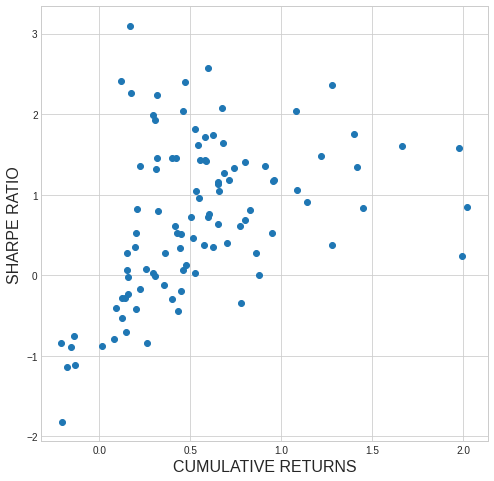

In [18]:
x = summary_table['CUMULATIVE_RETURNS']
y = summary_table['SHARPE_RATIO']

with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=((8 , 8)))
    plt.scatter(x,y)
    plt.xlabel('CUMULATIVE RETURNS', fontsize = 16)
    plt.ylabel('SHARPE RATIO', fontsize = 16)
    plt.show()

### Questions: 

- Should we exclude companies with Sharpe Ratio $\le 1$ ?

Method 2 for stocks selection 

by comparing returns of stocks with returns of SPY and labeling them to choose target stocks

In [19]:
sbls = ['AAPL','AMZN','AMD','BAC','F','NVDA','T','AAL','GOOGL','GOOG','MSFT','WFC','PFE','INTC','CCL','MU','CSCO','FCX','MRO','M','XOM','CMCSA','OXY','C','DAL','UAL','NCLH','BA','PCG','HAL','JPM','KO','KMI','VZ','BMY','CSX','SLB','ORCL','MGM','DIS','GM','MS','HPQ','QCOM','COTY','RF','HBAN','KEY','GE','MRK','HPE','GILD','EBAY','AIV','SCHW','MO','WMB','RRC','APA','KR','CVS','HST','BSX','SBUX','CVX','GPS','LUV','V','ABBV','AMAT','NEE','DVN','NEM','EXC','KHC','COP','ATVI','PYPL','PG','JNJ','WMT','MPC','NFLX','RCL','USB','TJX','NKE','FTI','MDLZ','CRM','FITB','WBA','SYF','KSS','HBI','EQT','UAA','WU','ABT','CNP','JWN']

In [20]:
# split stocks and SPY from the df to make it easier to do the comparison
ret_stocks = returns[sbls]; print (len(sbls))

101


In [21]:
# create array of the stocks monthly returns
ret = np.array(ret_stocks)

In [22]:
# create array of SPY monthly returns
return_SPY = returns['SPY']
bm = np.ones((32,101))  # changed from 44 to 32
for i in range(32):
    bm[i,:] = bm[i,:]*return_SPY[i]

In [23]:
# create array of 'monthly returns of stock - monthly returns of SPY'
dif = ret - bm
dif

array([[ 0.00789905, -0.07832189, -0.06846667, ...,  0.03609517,
        -0.0576422 , -0.01366984],
       [ 0.08809488,  0.07229999,  0.07093716, ...,  0.01625358,
         0.01443103, -0.07497262],
       [ 0.01099874,  0.03642162,  0.03724307, ..., -0.05019091,
        -0.03566508, -0.1134407 ],
       ...,
       [ 0.03721822, -0.06048627,  0.10275877, ...,  0.01579682,
         0.01057206, -0.12265056],
       [ 0.01116993,  0.01327436,  0.01289956, ...,  0.01876973,
        -0.04429238, -0.1654093 ],
       [-0.01699037, -0.00386809, -0.02097859, ..., -0.01555542,
         0.03599812, -0.0258481 ]])

In [24]:
# translate into One hot encodings(labels)
for i in range(32): # changed from 44 to 32
    for j in range(101):
        if dif[i,j] > 0:
            dif[i,j] = 1
        else:
            dif[i,j] = 0

In [25]:
labels = pd.DataFrame(dif,columns = ret_stocks.columns)
labels.index = ret_stocks.index
labels.head(2)

,AAPL,AMZN,AMD,BAC,F,NVDA,T,AAL,GOOGL,GOOG,...,WBA,SYF,KSS,HBI,EQT,UAA,WU,ABT,CNP,JWN
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-01,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2019-03-01,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


In [26]:
# just have a try
labels['AAPL'].value_counts()
labels['AMZN'].value_counts()

0.0    18
1.0    14
Name: AMZN, dtype: int64

In [27]:
# count the number of 1 for each stock
N_1 = []
N_0 = []
for t in labels.columns:
    a = len(labels[labels[t] == 1])
    b = len(labels[labels[t] == 0])
    N_1.append(a)
    N_0.append(b)
count = np.array([N_1,N_0])
count = pd.DataFrame(count,columns = ret_stocks.columns)
count.index = [1,0]

In [28]:
# sort stocks according to the count of 1
rslt_count = count.sort_values(by = 1, axis = 1, ascending=False)
rslt_count

,NVDA,AAPL,AMAT,PYPL,MSFT,SYF,MS,RF,KEY,V,...,BMY,MO,CNP,HPE,MDLZ,DIS,COP,T,WBA,VZ
1,23,22,22,21,21,20,19,19,19,19,...,11,11,11,11,10,10,10,10,9,9
0,9,10,10,11,11,12,13,13,13,13,...,21,21,21,21,22,22,22,22,23,23


In [29]:
# output the ticker of the top 20 stocks
stocks = rslt_count.columns[:20].values
print(stocks)

['NVDA' 'AAPL' 'AMAT' 'PYPL' 'MSFT' 'SYF' 'MS' 'RF' 'KEY' 'V' 'QCOM' 'APA'
 'HPQ' 'AMD' 'CMCSA' 'UAA' 'DVN' 'USB' 'NCLH' 'NKE']


Comapre stocks selected from both methods and find the final chosen stocks

In [30]:
# Compare the stocks got from sort_method_1 and sort_method_2
stocks_1 = summary_table['COMPANY'][:20].values
print(stocks_1)
stocks_final = []
for s in stocks:
  if s in stocks_1:
    stocks_final.append(s)
print('stocks finally selected is',stocks_final)

['APA' 'RRC' 'NVDA' 'AMD' 'FCX' 'AMAT' 'AAPL' 'QCOM' 'DVN' 'PYPL' 'COTY'
 'MS' 'MSFT' 'GOOG' 'GOOGL' 'MGM' 'EBAY' 'MRO' 'EQT' 'SYF']
stocks finally selected is ['NVDA', 'AAPL', 'AMAT', 'PYPL', 'MSFT', 'SYF', 'MS', 'QCOM', 'APA', 'AMD', 'DVN']


In [31]:
# Create DataFrame of returns of the selected 20 stocks and get the expected return for each
ret_select = returns[stocks_final]
ret_mean = ret_select.cumsum().iloc[-1]
gp = {'Cumulative Returns':ret_mean}
ret_mean = pd.DataFrame(gp)
ret_mean

,Cumulative Returns
NVDA,1.976876
AAPL,1.399127
AMAT,1.416472
PYPL,1.219991
MSFT,1.084180
SYF,0.829413
MS,1.085079
QCOM,1.279928
APA,2.022815
AMD,1.665476


Correlation among the chosen stocks

In [32]:
# correlation matrix
ret_final = returns[stocks_final]
corr_df = ret_final.corr(method='pearson')
corr_df.head().reset_index()
corr_df

,NVDA,AAPL,AMAT,PYPL,MSFT,SYF,MS,QCOM,APA,AMD,DVN
NVDA,1.000000,0.606751,0.290211,0.486995,0.507170,0.271024,0.404170,0.345350,0.190705,0.449676,0.222984
AAPL,0.606751,1.000000,0.324938,0.557077,0.800331,0.426706,0.570582,0.596217,0.385248,0.635376,0.371547
AMAT,0.290211,0.324938,1.000000,0.475930,0.308795,0.646195,0.777107,0.415081,0.417055,0.261319,0.606323
PYPL,0.486995,0.557077,0.475930,1.000000,0.628525,0.582715,0.670435,0.472389,0.636497,0.426155,0.565153
MSFT,0.507170,0.800331,0.308795,0.628525,1.000000,0.434986,0.601639,0.662899,0.492573,0.400429,0.461063
SYF,0.271024,0.426706,0.646195,0.582715,0.434986,1.000000,0.818480,0.398364,0.635374,0.163483,0.799770
MS,0.404170,0.570582,0.777107,0.670435,0.601639,0.818480,1.000000,0.558455,0.560195,0.348448,0.725293
QCOM,0.345350,0.596217,0.415081,0.472389,0.662899,0.398364,0.558455,1.000000,0.298638,0.465169,0.328349
APA,0.190705,0.385248,0.417055,0.636497,0.492573,0.635374,0.560195,0.298638,1.000000,0.263844,0.872023
AMD,0.449676,0.635376,0.261319,0.426155,0.400429,0.163483,0.348448,0.465169,0.263844,1.000000,0.210207


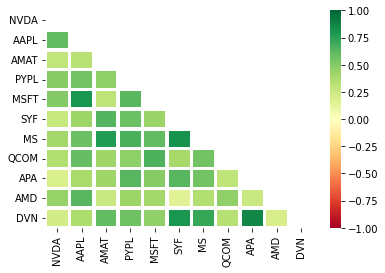

In [33]:
# plot a heatmap of the correlations 
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

stocks are positively correlated with each other and we can tell that some are highly correlated, so then we consider to do the clustering.

Hierarchical Clustering

In [34]:
from sklearn.preprocessing import normalize
# normalize the data
ret_scaled = normalize(ret_final)
ret_scaled = pd.DataFrame(ret_scaled, columns=ret_final.columns)
ret_scaled.index = returns.index

In [35]:
ret_scaled = ret_scaled.T
ret_scaled.head()

Date,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,...,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01
NVDA,0.326214,0.648875,0.013535,-0.493160,0.519364,0.125379,-0.027570,0.153986,0.424603,0.309357,...,-0.087780,-0.029489,0.091019,-0.132016,0.481038,0.360300,0.634602,-0.099811,0.566533,-0.233944
AAPL,0.179876,0.399559,0.095251,-0.250052,0.327678,0.350340,-0.077593,0.295166,0.303553,0.294038,...,0.395510,-0.034491,-0.132279,0.043725,0.293678,-0.228172,0.276994,0.259975,0.156668,-0.209557
AMAT,-0.084487,0.156005,0.187673,-0.239284,0.405008,0.455428,-0.105123,0.167975,0.239627,0.265379,...,0.167778,0.754033,0.362955,0.655151,-0.025669,0.178838,0.089744,-0.069395,-0.131302,-0.143453
PYPL,0.467994,0.231083,0.145145,-0.052491,0.104265,-0.162667,-0.047010,-0.191835,0.013502,0.148584,...,0.318383,0.002945,0.177819,-0.323603,0.308614,-0.037898,0.331897,-0.218922,0.182405,-0.309928
MSFT,0.324711,0.224855,0.181170,-0.103857,0.211679,0.079080,0.044854,0.045384,0.085611,0.221015,...,0.141662,0.268892,0.002954,0.083668,0.268185,-0.043410,0.240010,0.206903,0.227990,-0.202295


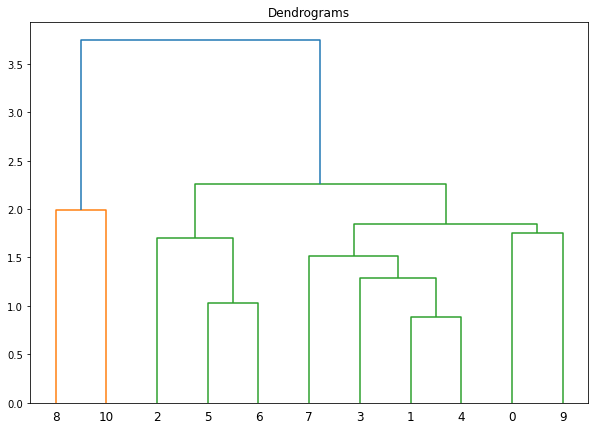

In [36]:
# decide the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(ret_scaled, method='ward'))

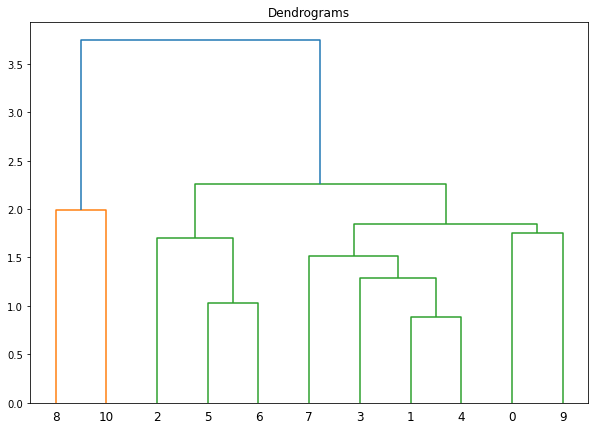

In [37]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(ret_scaled, method='ward'))
plt.axhline(y=35, color='b', linestyle='--')
plt.show()

The largest distance is around 15, so we can segment into 4 clusters

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(ret_scaled)

array([0, 0, 2, 0, 0, 2, 2, 0, 3, 0, 1])